I simulate the photometric variable induced behavior as a random walk process.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline
# %config InlineBackend.figure_format = "svg"

# My progs
from myprogs.vlbi.ts_func import get_ts

np.random.seed(3)

In [2]:
souname = "0552+398"
coordts = get_ts(souname, calc_oft=True)

plotdir = "../plots"

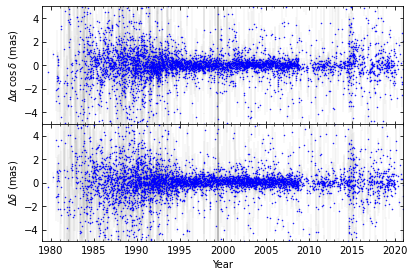

In [3]:
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, sharey=True)

ax0.errorbar(coordts["jyear"], coordts["dra"], yerr=coordts["ra_err"],
             fmt="b.", ecolor="grey", elinewidth=0.1, ms=1)
ax1.errorbar(coordts["jyear"], coordts["ddec"], yerr=coordts["dec_err"],
             fmt="b.", ecolor="grey", elinewidth=0.1, ms=1)

ax0.xaxis.set_minor_locator(MultipleLocator(1))

ax0.set_ylabel("$\Delta\\alpha\,\cos\delta$ ($\mathrm{mas}$)")
ax1.set_ylabel("$\Delta\delta$ ($\mathrm{mas}$)")
ax1.set_xlabel("Year")
ax1.set_ylim([-5, 5])
ax1.set_xlim([1979, 2021])

# ax0.set_title("Coordinate offset for {}".format(souname))

plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.savefig("{:s}/{:s}.eps".format(plotdir, souname))

Simulate the random walk process.

In [4]:
from tool_func import random_walk

In [5]:
dra, ddec = random_walk(coordts["jyear"], t_scale=5, sigma_var=3)

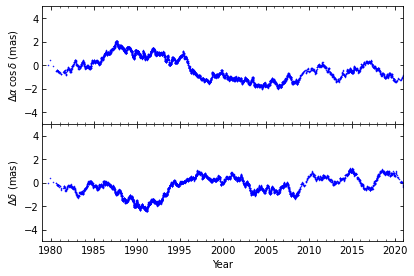

In [6]:
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, sharey=True)

ax0.errorbar(coordts["jyear"], dra, 
             fmt="b.", ecolor="grey", elinewidth=0.1, ms=1)
ax1.errorbar(coordts["jyear"], ddec, 
             fmt="b.", ecolor="grey", elinewidth=0.1, ms=1)

ax0.xaxis.set_minor_locator(MultipleLocator(1))

ax0.set_ylabel("$\Delta\\alpha\,\cos\delta$ ($\mathrm{mas}$)")
ax1.set_ylabel("$\Delta\delta$ ($\mathrm{mas}$)")
ax1.set_xlabel("Year")
ax1.set_ylim([-5, 5])
ax1.set_xlim([1979, 2021])

# ax0.set_title("Random walk simulation for {}".format(souname))

plt.tight_layout()
plt.subplots_adjust(hspace=0)

plt.savefig("{:s}/{:s}-RW.eps".format(plotdir, souname))